# Liesel-GAM Demo Notebook

## Setup and Imports

In [6]:
import jax.numpy as jnp
import liesel.goose as gs
import liesel.model as lsl
import tensorflow_probability.substrates.jax.distributions as tfd

import liesel_gam as gam

In [7]:
# import data from R
from ryp import r, to_py

r("library(mgcv)")
r("data(columb)")
r("data(columb.polys)")

columb = to_py("columb", format="pandas").reset_index()
polys = to_py("columb.polys", format="numpy")

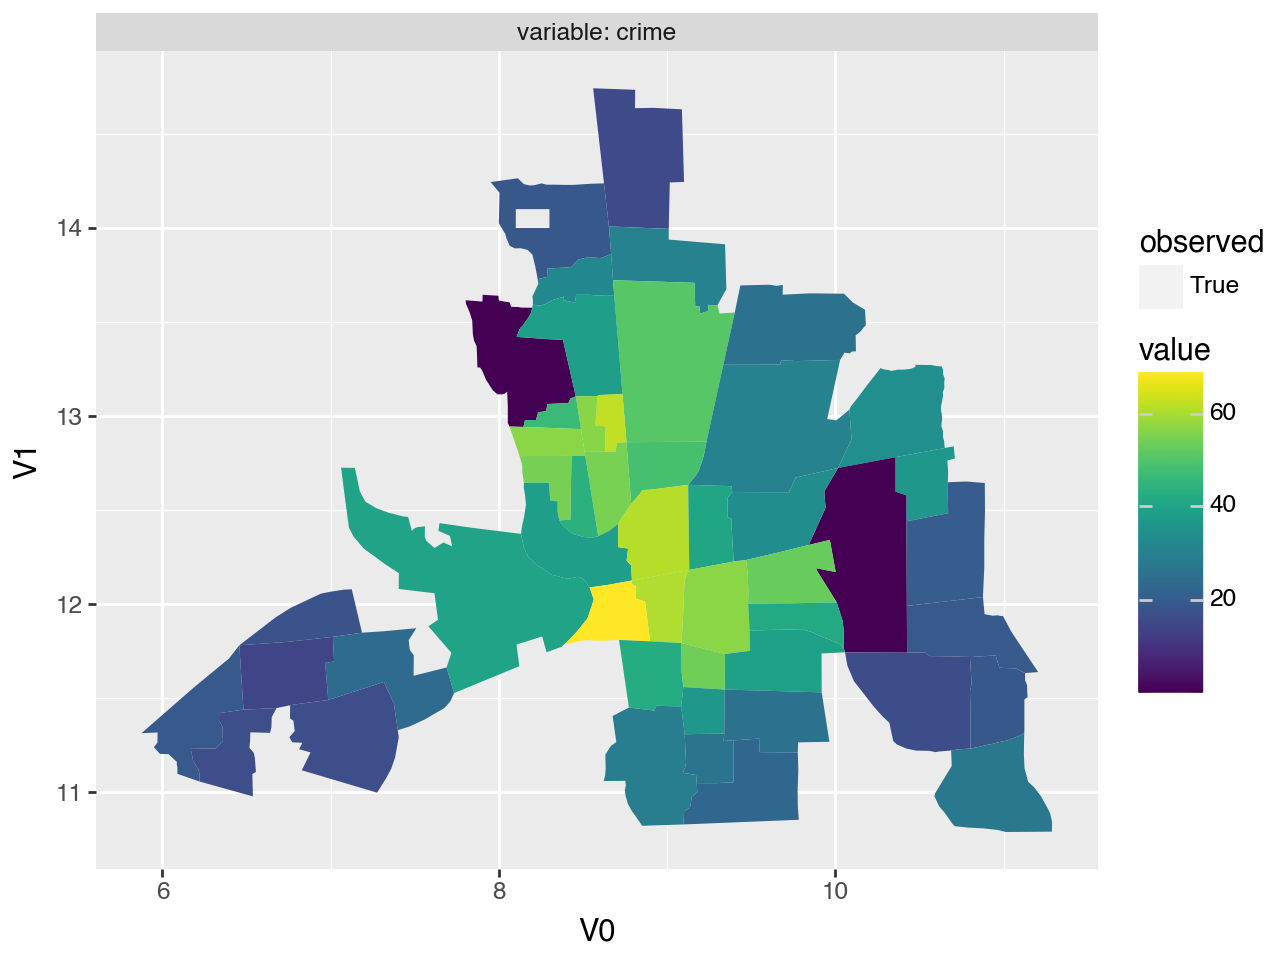

In [8]:
gam.plot_polys(region="district", which=["crime"], df=columb, polys=polys)

## Model Definition

### Setup response model

In [9]:
df = columb

loc = gam.AdditivePredictor("$\\mu$")
scale = gam.AdditivePredictor("$\\sigma$", inv_link=jnp.exp)


y = lsl.Var.new_obs(
    value=df.crime.to_numpy(),
    distribution=lsl.Dist(tfd.Normal, loc=loc, scale=scale),
    name="y",
)

tb = gam.TermBuilder.from_df(df)
loc += tb.ri("district", factor_scale=True)

### Build and plot model

liesel.model.model - INFO - Converted dtype of Value(name="y_value").value


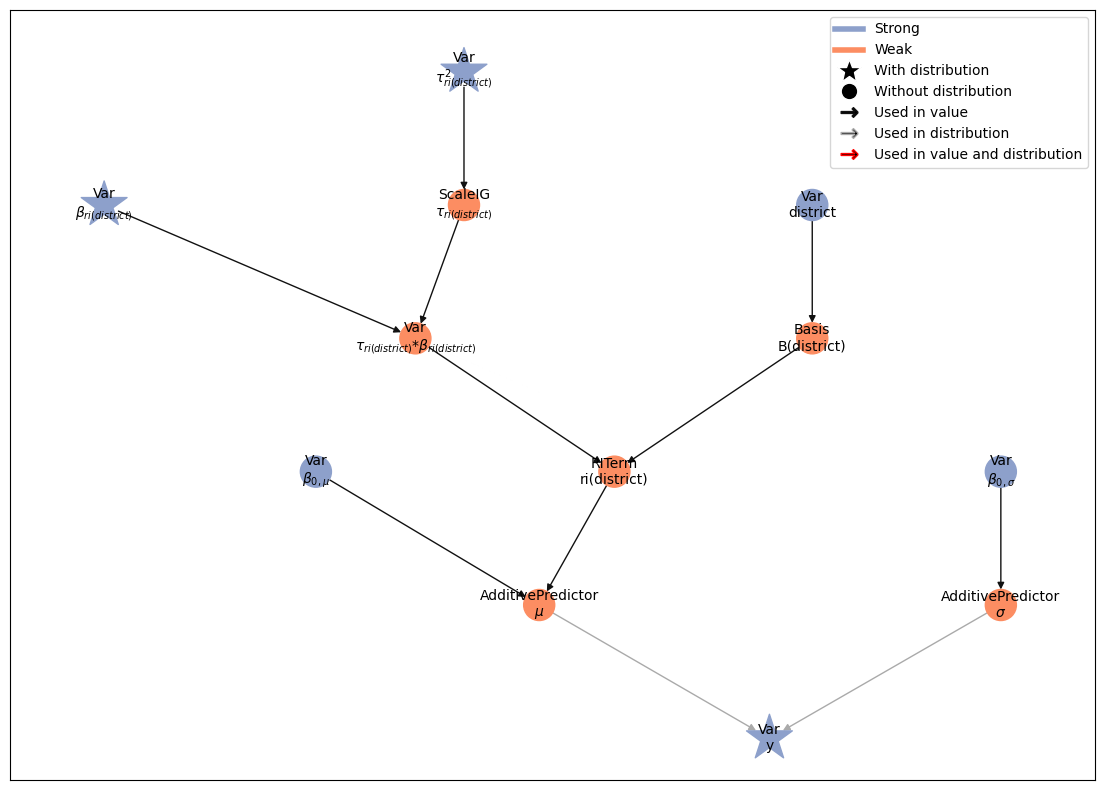

In [10]:
model = lsl.Model([y])
model.plot_vars()

## Run MCMC

In [11]:
eb = gs.LieselMCMC(model).get_engine_builder(seed=1, num_chains=4)

eb.set_epochs(
    gs.stan_epochs(
        warmup_duration=1000,
        posterior_duration=10000,
        init_duration=400,
        term_duration=400,
        thinning_posterior=10,
    )
)
engine = eb.build()
engine.sample_all_epochs()
results = engine.get_results()

liesel.goose.builder - WARNING - No jitter functions provided for position keys '$\\beta_{0,\\sigma}$', '$\\beta_{0,\\mu}$', '$\\beta_{ri(district)}$', '$\\tau^2_{ri(district)}$'. The initial values for these keys won't be jittered
liesel.goose.engine - INFO - Initializing kernels...
liesel.goose.engine - INFO - Done
liesel.goose.engine - INFO - Starting epoch: FAST_ADAPTATION, 400 transitions, 25 jitted together
100%|████████████████████████████████████████| 16/16 [00:03<00:00,  5.27chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 25 transitions, 25 jitted together
100%|████████████████████████████████████████| 1/1 [00:00<00:00, 1430.53chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 50 transitions, 25 jitted together
100%|████████████████████████████████████████| 2/2 [00:00<00:00, 1397.87chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose.e

### MCMC summary

In [12]:
summary = gs.Summary(results)
summary

Parameter summary:

                                  kernel       mean         sd     q_0.05  \
parameter               index                                               
$\beta_{0,\mu}$         ()     kernel_01  35.105774   2.473614  31.001858   
$\beta_{0,\sigma}$      ()     kernel_00   2.823080   0.108438   2.646573   
$\beta_{ri(district)}$  (0,)   kernel_02  -0.086440   1.010317  -1.756086   
                        (1,)   kernel_02  -0.040932   1.011937  -1.689393   
                        (2,)   kernel_02  -0.013441   0.986196  -1.633444   
                        (3,)   kernel_02  -0.002774   0.990378  -1.624686   
                        (4,)   kernel_02   0.013065   0.977634  -1.615857   
                        (5,)   kernel_02  -0.042463   0.989017  -1.649217   
                        (6,)   kernel_02  -0.130369   1.038849  -1.845786   
                        (7,)   kernel_02   0.015357   0.958333  -1.540550   
                        (8,)   kernel_02  -0.003896   0.995442  -1.666090   
                        (9,)   kernel_02  -0.000183   1.009164  -1.677133   
                        (10,)  kernel_02   0.105120   1.022312  -1.553080   
                        (11,)  kernel_02   0.031796   1.003968  -1.638199   
                        (12,)  kernel_02   0.021127   0.978167  -1.590998   
                        (13,)  kernel_02   0.025920   0.978462  -1.565782   
                        (14,)  kernel_02   0.027097   0.995436  -1.598157   
                        (15,)  kernel_02   0.062923   1.013484  -1.623904   
                        (16,)  kernel_02  -0.014629   1.003570  -1.684539   
                        (17,)  kernel_02   0.010284   0.994195  -1.619679   
                        (18,)  kernel_02   0.037152   1.014580  -1.597945   
                        (19,)  kernel_02  -0.086906   1.012283  -1.771925   
                        (20,)  kernel_02   0.007934   0.989366  -1.612056   
                        (21,)  kernel_02  -0.003632   0.975666  -1.621586   
                        (22,)  kernel_02  -0.043440   0.988177  -1.669160   
                        (23,)  kernel_02  -0.015640   1.002139  -1.648849   
                        (24,)  kernel_02   0.072367   1.024865  -1.548004   
                        (25,)  kernel_02   0.018686   0.986441  -1.614184   
                        (26,)  kernel_02   0.055766   1.026060  -1.629368   
                        (27,)  kernel_02   0.051456   1.000904  -1.592872   
                        (28,)  kernel_02   0.067167   0.991096  -1.537540   
                        (29,)  kernel_02   0.087712   1.009258  -1.590257   
                        (30,)  kernel_02  -0.075195   0.991184  -1.705554   
                        (31,)  kernel_02  -0.035306   1.004729  -1.695835   
                        (32,)  kernel_02   0.027174   1.000789  -1.607043   
                        (33,)  kernel_02  -0.025058   1.014417  -1.708105   
                        (34,)  kernel_02   0.015877   0.988372  -1.615165   
                        (35,)  kernel_02  -0.028571   0.987908  -1.623612   
                        (36,)  kernel_02  -0.013000   0.969245  -1.610918   
                        (37,)  kernel_02   0.050601   1.018160  -1.650640   
                        (38,)  kernel_02  -0.031385   1.003550  -1.708058   
                        (39,)  kernel_02  -0.082176   0.996629  -1.732822   
                        (40,)  kernel_02  -0.064475   1.011133  -1.736178   
                        (41,)  kernel_02  -0.026122   1.011606  -1.694057   
                        (42,)  kernel_02  -0.001627   0.994194  -1.628787   
                        (43,)  kernel_02  -0.010708   0.983306  -1.599274   
                        (44,)  kernel_02  -0.012159   1.000894  -1.656586   
                        (45,)  kernel_02  -0.061988   1.009686  -1.697185   
                        (46,)  kernel_02  -0.005537   1.003675  -1.633003   
                        (47,)  kernel_02   0.027294  

## Plots

In [13]:
samples = results.get_posterior_samples()

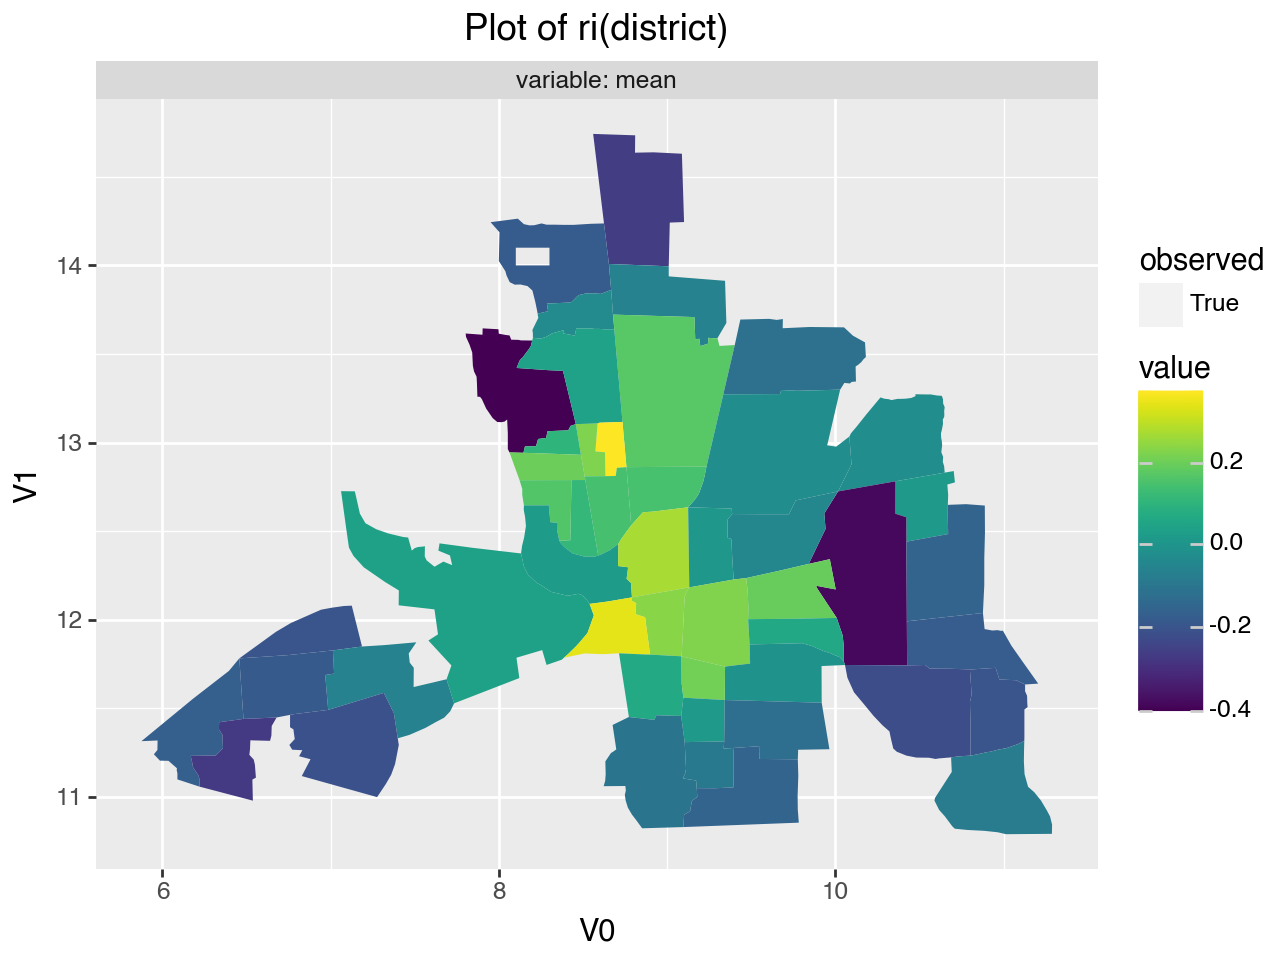

In [14]:
gam.plot_regions(term=loc.terms["ri(district)"], samples=samples, polys=polys)

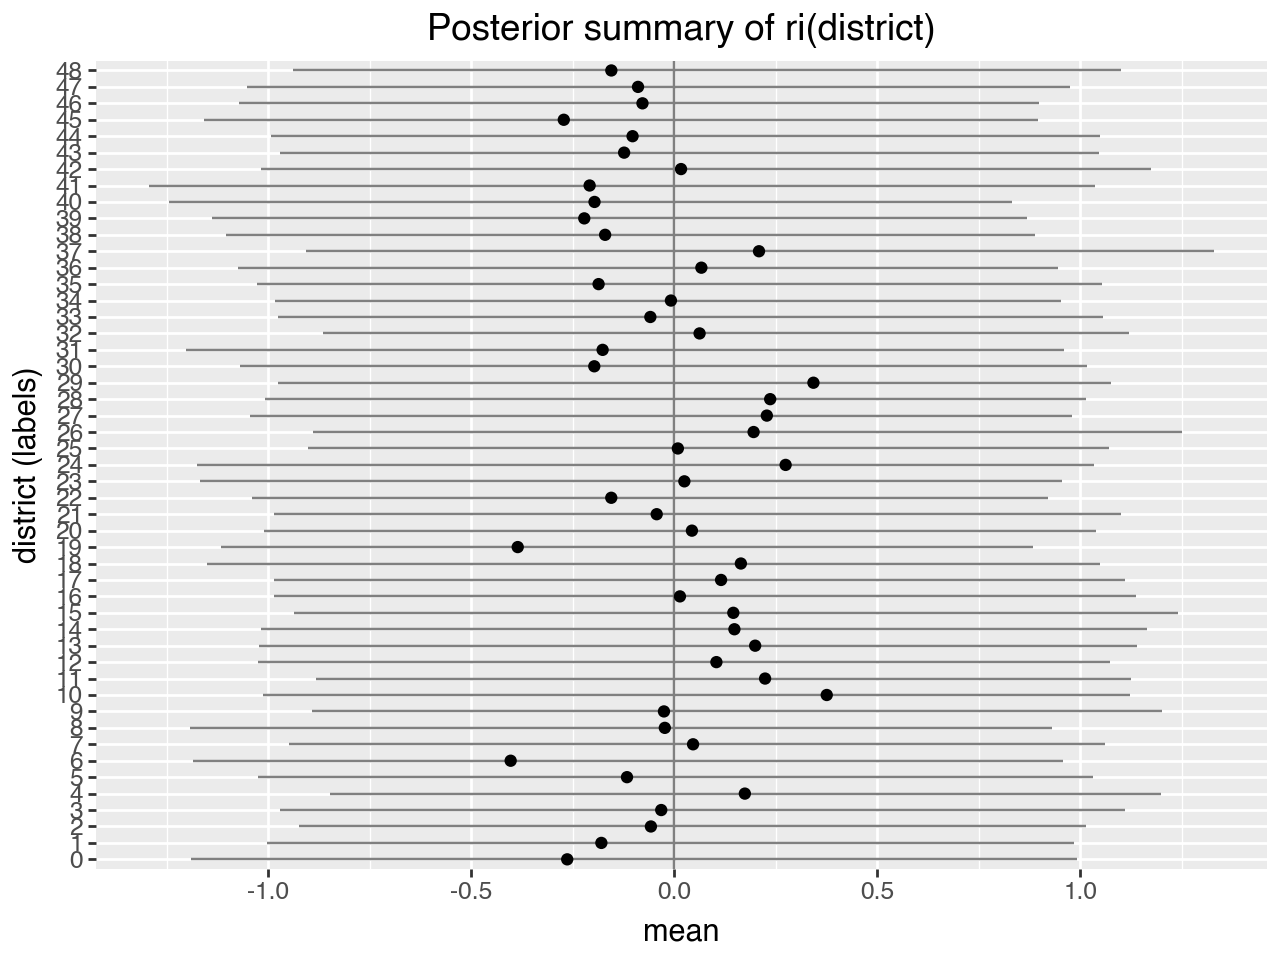

In [15]:
gam.plot_forest(
    term=loc.terms["ri(district)"],
    samples=samples,
    # labels=tb.bases.mappings["district"],
)